In [2]:
### import data libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [3]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [201]:
# Import ".json" file for Santa Clara County. 

county_geo = r'/Users/taraross/Desktop/all/DataAnalytics/Tasks/Achievement 6/USETHIS/stanford-ht248yt3124-geojson.json'

In [18]:
path = '/Users/taraross/Desktop/all/DataAnalytics/Tasks/Achievement 6'

In [19]:
# import the listings data
df = pd.read_csv(os.path.join(path, 'USETHIS', 'listings_clean.csv'))

In [28]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,4952,Place to stay in Palo Alto · ★4.81 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43932,-122.15741,Private room,65.0,7,84,10/28/23,0.48,5,253,7
1,11464,Rental unit in Santa Clara · ★4.50 · Studio · ...,42458,Emey,Santa Clara,37.34415,-121.98701,Entire home/apt,94.0,3,20,8/5/23,0.17,13,152,4
2,21373,Place to stay in Palo Alto · ★4.87 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43972,-122.15532,Private room,67.0,7,266,9/16/23,1.61,5,300,5
3,62799,Place to stay in Palo Alto · ★4.89 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43934,-122.15723,Private room,83.0,7,157,12/16/23,1.35,5,309,6
4,75284,Place to stay in Palo Alto · ★4.87 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43923,-122.15745,Private room,70.0,7,214,12/11/23,1.39,5,302,6


## Data Wrangling

In [209]:
current = df[['name', 'neighbourhood', 'room_type', 'price', 'number_of_reviews']]

In [210]:
current.head()

,name,neighbourhood,room_type,price,number_of_reviews
0,Place to stay in Palo Alto · ★4.81 · 1 bedroom...,Palo Alto,Private room,65.0,84
1,Rental unit in Santa Clara · ★4.50 · Studio · ...,Santa Clara,Entire home/apt,94.0,20
2,Place to stay in Palo Alto · ★4.87 · 1 bedroom...,Palo Alto,Private room,67.0,266
3,Place to stay in Palo Alto · ★4.89 · 1 bedroom...,Palo Alto,Private room,83.0,157
4,Place to stay in Palo Alto · ★4.87 · 1 bedroom...,Palo Alto,Private room,70.0,214


## Consistency Checks

In [211]:
# check for missing values
current.isnull().sum()

name                 0
neighbourhood        0
room_type            0
price                0
number_of_reviews    0
dtype: int64

In [212]:
### No missing values

In [213]:
dups = current.duplicated()

In [214]:
dups.shape # no dups

(4845,)

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

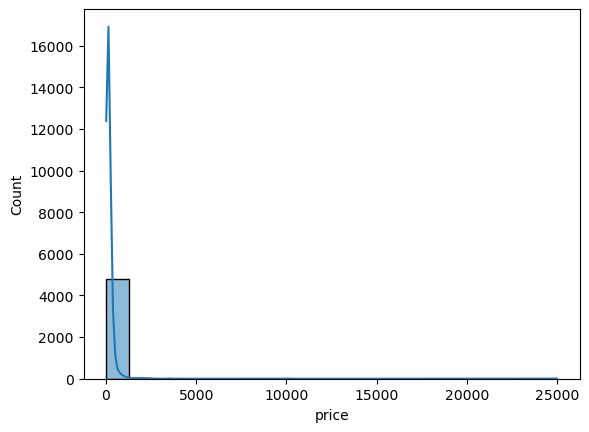

In [215]:
# Check for extreme values
sns.histplot(current['price'], bins=20,kde=True) # shows extreme values for price

In [216]:
current[current['price'] >5000]

,name,neighbourhood,room_type,price,number_of_reviews
2274,Boutique hotel in Palo Alto · ★4.80 · 1 bedroo...,Palo Alto,Private room,25000.0,5
2275,Boutique hotel in Palo Alto · ★4.86 · 1 bedroo...,Palo Alto,Private room,25000.0,7
3392,Home in Sunnyvale · ★4.57 · 2 bedrooms · 3 bed...,Sunnyvale,Entire home/apt,9999.0,7
4365,Hotel in Cupertino · 1 bedroom · 1 bed · 1 bath,Cupertino,Private room,9999.0,2
4544,Rental unit in San Jose · 1 bedroom · 2 beds ·...,San Jose,Entire home/apt,9600.0,1


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

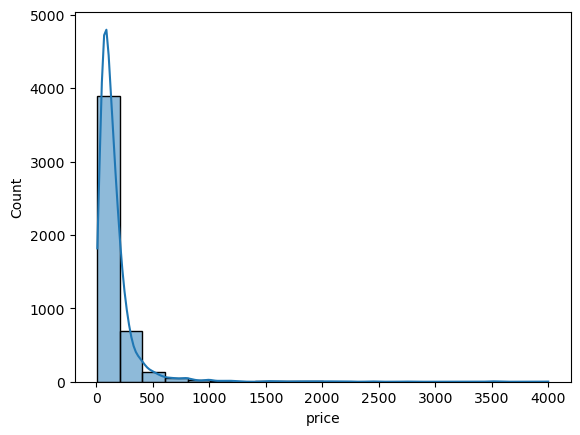

In [185]:
# Check for extreme values
sns.histplot(current['price'], bins=20,kde=True) # shows extreme values for price

In [217]:
# Clean extreme values

current = current[current['price'] < 5000]

In [219]:
current.shape

(4840, 5)

In [220]:
current.dtypes

name                  object
neighbourhood         object
room_type             object
price                float64
number_of_reviews      int64
dtype: object

## Plotting a choropleth

In [221]:
data_to_plot = current[['neighbourhood', 'price']]
data_to_plot.head()

,neighbourhood,price
0,Palo Alto,65.0
1,Santa Clara,94.0
2,Palo Alto,67.0
3,Palo Alto,83.0
4,Palo Alto,70.0


In [222]:
data_to_plot['neighbourhood'] = data_to_plot['neighbourhood'].str.upper()

/var/folders/_p/wjzjhv4d3_d8lbx7d_th7l740000gp/T/ipykernel_48224/1191681765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_plot['neighbourhood'] = data_to_plot['neighbourhood'].str.upper()


In [223]:
data_to_plot.head()

,neighbourhood,price
0,PALO ALTO,65.0
1,SANTA CLARA,94.0
2,PALO ALTO,67.0
3,PALO ALTO,83.0
4,PALO ALTO,70.0


In [226]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[38, -123], zoom_start=6)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = county_geo, 
    data = data_to_plot,
    columns = ['neighbourhood', 'price'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'RdPu', fill_opacity=0.6, line_opacity=1,
    legend_name = "price").add_to(map)
folium.LayerControl().add_to(map)

map

In [227]:
map.save('plot_data.html')

The map above illustrates the distribution of Airbnb prices per night acress various cities in Santa Clara County.  The analysis reveals that Santa Clara has the highest nightly rates, which aligns with expectations given its economic profile and proximity to major tech hubs.  Interestingly, Milpitas and Morgan Hill also exhibit relativetly high prices, which is surprising based on my knowledge of the area. This unexpected finding suggests that there may be factors at play in these cities that contribute to higher Airbnb costs.

In terms of research questions, the analysis answers my existing query regarding the geographical distribution of Airbnb prices within the county.  Additionally, it raises new questions about the underlying causes for the high prices in Milpitas and Morgan Hill. For instance, what specific amenities or attractions are driving up the costs in these areas? Are there recent developments or trends influencing the Airbnb market there? These questions could guide subsequent research to gain a deeper understanding of the local short-term rental market dynamics.

map.save('plot_data.html')